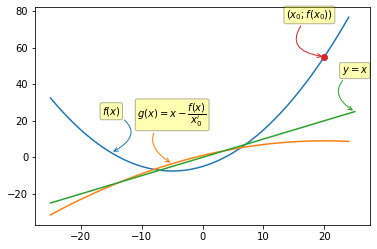

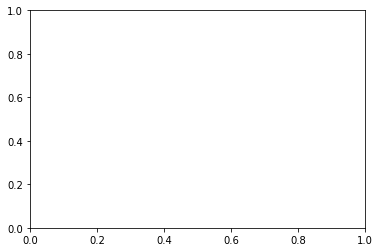

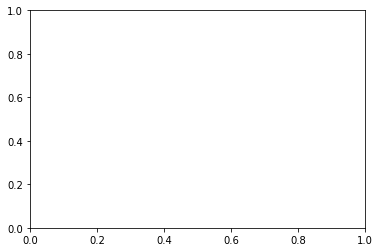

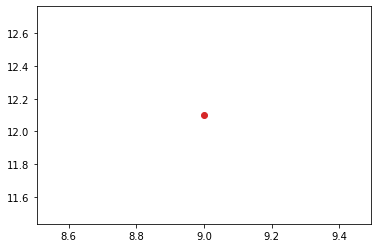

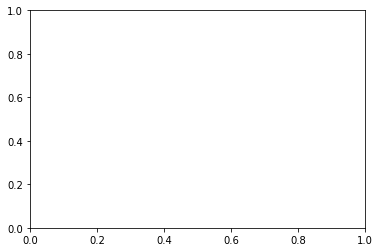

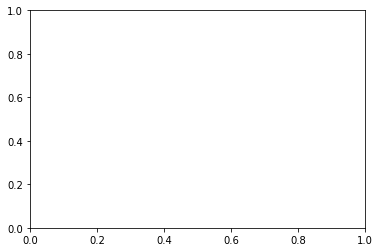

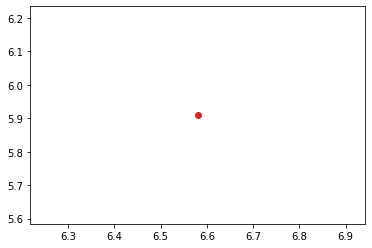

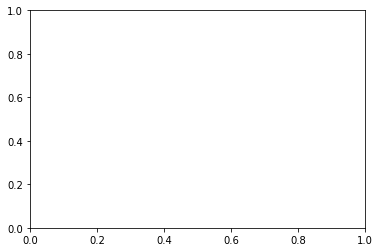

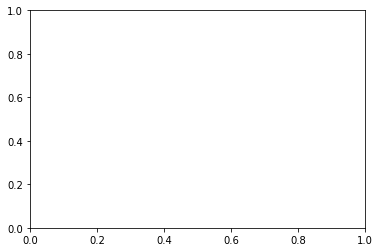

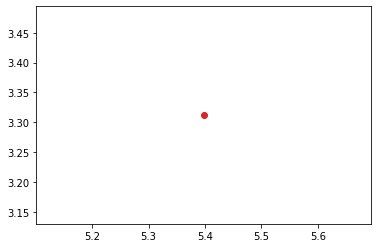

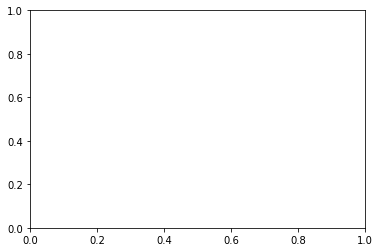

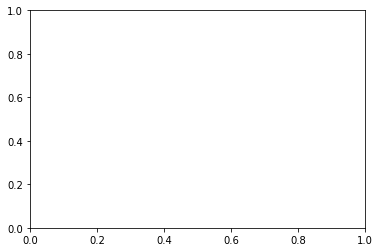

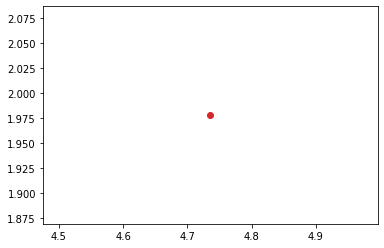

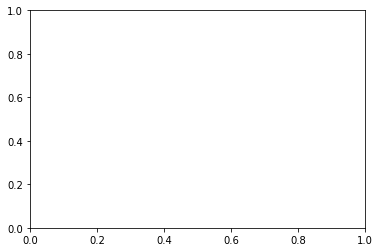

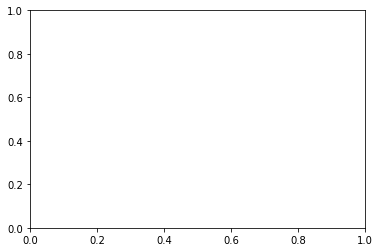

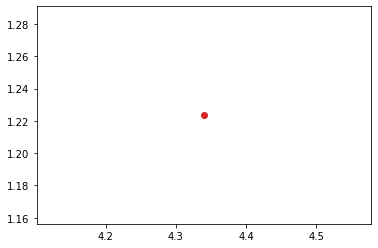

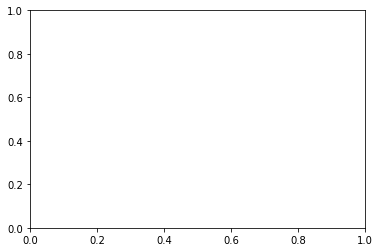

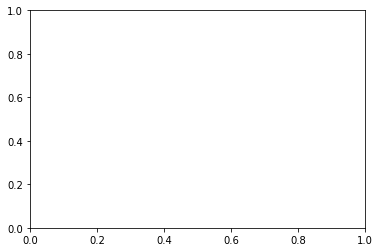

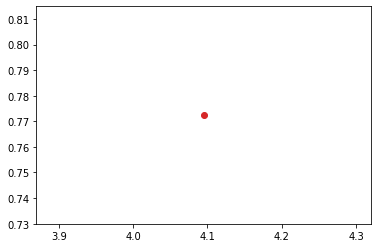

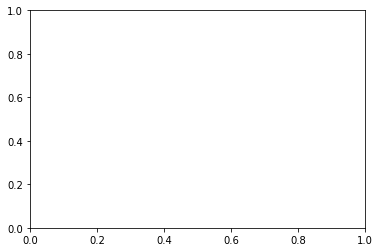

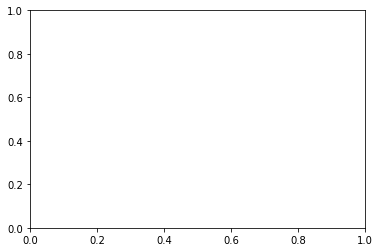

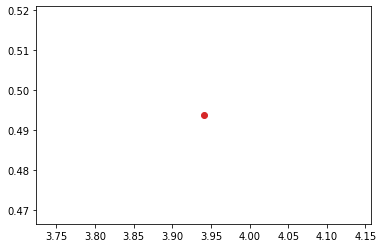

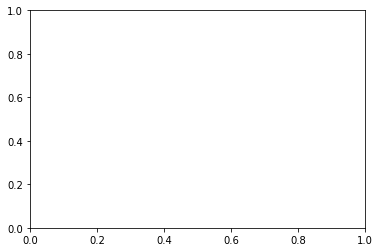

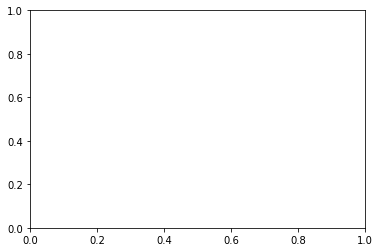

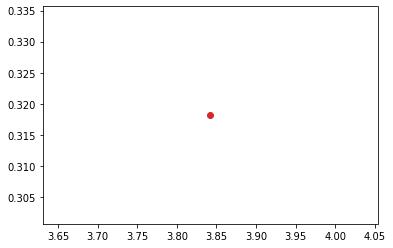

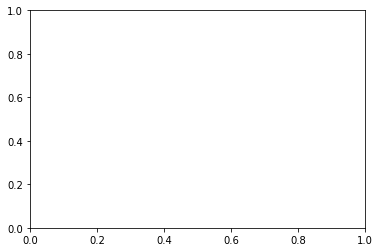

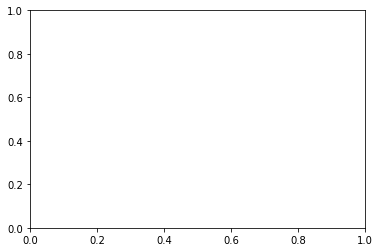

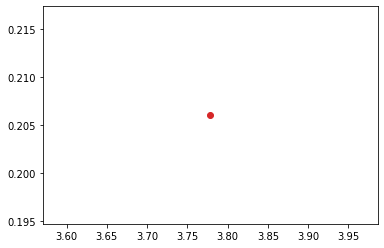

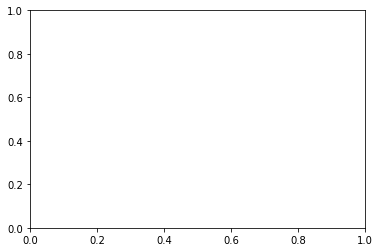

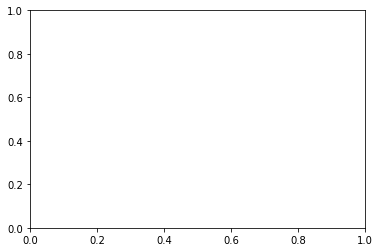

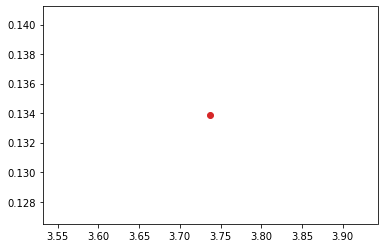

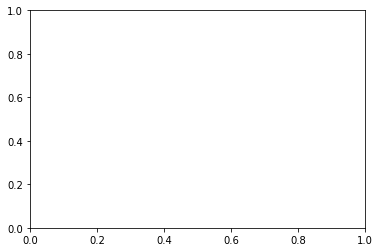

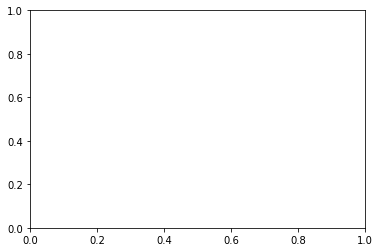

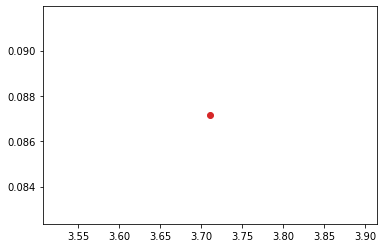

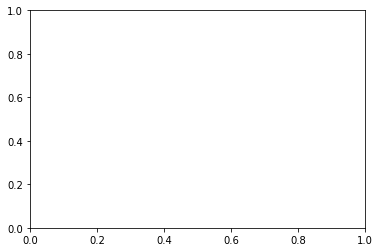

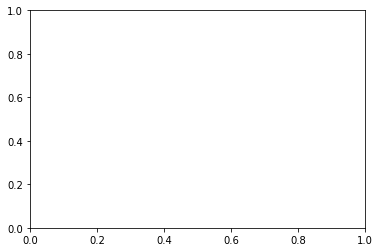

x = 3.7104269969435975, f(x) = 0.0871538469083859


<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from decimal import *
getcontext().prec = 6

plt.gcf().canvas.set_window_title('Modified Newton fixed-point iteration')

eps = 0.1
left_bound = 0
right_bound = 20

f = np.poly1d([0.1, 1, -5])
df = f.deriv()
d2f = df.deriv()

if f(left_bound) * f(right_bound) > 0:
    print('No or more than one roots.')
    exit()

if f(left_bound) * d2f(left_bound) > 0:
    x0 = left_bound
else:
    x0 = right_bound

x = x0
df_x0 = df(x0)

plt.annotate('$(x_0; f(x_0))$', xy=(x0, f(x0)), xytext=(-15, 35),
             textcoords='offset points', ha='center', va='bottom', color='black',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.95',
                             color='tab:red'))

test_range = np.array(range(-25, 25))
plt.plot(test_range, f(test_range))
plt.annotate('$f(x)$', xy=(test_range[10], f(test_range[10])), xytext=(0, 35),
             textcoords='offset points', ha='center', va='bottom', color='black',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.95',
                             color='tab:blue'))

plt.plot(test_range, eval('test_range - f(test_range) / df_x0'))
plt.annotate(r"$g(x) = x - \dfrac{f(x)}{x_0'}$",
             xy=(test_range[20], eval('test_range[20] - f(test_range[20]) / df_x0')), xytext=(0, 35),
             textcoords='offset points', ha='center', va='bottom', color='black',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.8',
                             color='tab:orange'))

plt.plot([-25, 25], [-25, 25])
plt.annotate('$y = x$', xy=(25, 25), xytext=(0, 35),
             textcoords='offset points', ha='center', va='bottom', color='black',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.8',
                             color='tab:green'))

while True:
    plt.plot(x, f(x), marker='o', color='tab:red')
    plt.pause(0.5)
    plt.arrow(x, f(x), 0, eval('(x - f(x) / df_x0) - f(x)'))
    plt.pause(0.5)
    plt.arrow(x, eval('x - f(x) / df_x0'), eval('(x - f(x) / df_x0) - x'), 0)
    plt.pause(0.5)
    plt.draw()

    if abs(f(x)) < eps:
        break

    x = x - f(x) / df_x0


print(f'x = {x}, f(x) = {f(x)}')
